In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [8]:
data=np.linspace(1,50,500)
y=np.sin(data)

In [12]:
df=pd.DataFrame(data=y,index=data,columns=["Sin"])

In [13]:
df

,Sin
1.000000,0.841471
1.098196,0.890388
1.196393,0.930726
1.294589,0.962097
1.392786,0.984198
...,...
49.607214,-0.611748
49.705411,-0.531247
49.803607,-0.445628
49.901804,-0.355715


In [14]:
len(df)

500

In [15]:
test_per=len(df)*0.1
test_per

50.0

In [28]:
train_set=df.iloc[:-int(test_per)]

In [25]:
train_set

,Sin
1.000000,0.841471
1.098196,0.890388
1.196393,0.930726
1.294589,0.962097
1.392786,0.984198
...,...
44.697395,0.655691
44.795591,0.726554
44.893788,0.790418
44.991984,0.846665


In [27]:
test_set=df.iloc[-int(test_per):]

In [31]:
test_set

,Sin
45.188377,0.934225
45.286573,0.964693
45.384770,0.985867
45.482966,0.997542
45.581162,0.999606
45.679359,0.992039
45.777555,0.974914
45.875752,0.948396
45.973948,0.912740
46.072144,0.868290


In [32]:
#As we know in RNN we give output from previos cell to next cell , so we should also scale the y in RNN 

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler=MinMaxScaler()
scaler.fit(train_set)

MinMaxScaler()

In [35]:
scaled_train=scaler.transform(train_set)
scaled_test=scaler.transform(test_set)

In [135]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
length=1
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)
len(generator) 

449

In [95]:
x,y=generator[0]
print(x,y)

[[[0.92080607]]] [[0.94526877]]


In [105]:
length=3
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)
len(generator)

447

In [106]:
x,y=generator[0]
print("x=",x,"\ny=",y)

x= [[[0.92080607]
  [0.94526877]
  [0.96544137]]] 
y= [[0.98112951]]


In [109]:
scaled_train[:4]

array([[0.92080607],
       [0.94526877],
       [0.96544137],
       [0.98112951]])

<AxesSubplot:>

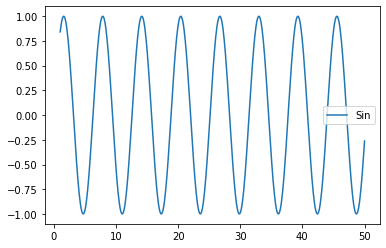

In [110]:
df.plot()

In [117]:
length=25
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)
len(generator)

425

In [118]:
x,y=generator[0]
print(x,y)

[[[0.92080607]
  [0.94526877]
  [0.96544137]
  [0.98112951]
  [0.99218204]
  [0.99849247]
  [1.        ]
  [0.99669011]
  [0.98859468]
  [0.97579171]
  [0.95840457]
  [0.93660076]
  [0.91059036]
  [0.88062399]
  [0.84699035]
  [0.8100135 ]
  [0.77004971]
  [0.72748402]
  [0.68272654]
  [0.63620849]
  [0.58837807]
  [0.53969612]
  [0.49063167]
  [0.44165745]
  [0.39324532]]] [[0.34586172]]


In [119]:
x.shape

(1, 25, 1)

In [175]:
n_features=1
model=Sequential()
model.add(SimpleRNN(25,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [176]:
model.fit_generator(generator,epochs=10)

<ipython-input-176-063492f5aede>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=5)


Epoch 1/5
425/425 [==============================] - 3s 5ms/step - loss: 0.0073
Epoch 2/5
425/425 [==============================] - 2s 5ms/step - loss: 5.1074e-04
Epoch 3/5
425/425 [==============================] - 2s 6ms/step - loss: 1.0424e-04
Epoch 4/5
425/425 [==============================] - 2s 6ms/step - loss: 2.7657e-04
Epoch 5/5
425/425 [==============================] - 2s 5ms/step - loss: 1.1119e-04


In [177]:
results=pd.DataFrame(model.history.history)
results

,loss
0,0.007253
1,0.000511
2,0.000104
3,0.000277
4,0.000111


<AxesSubplot:>

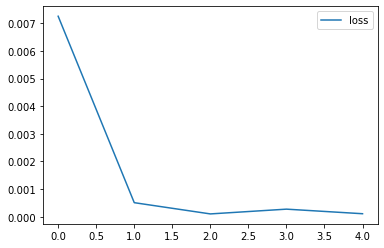

In [178]:
results.plot()

In [184]:
first_Eval_batch=scaled_train[-length:].reshape(1,length,n_features)
first_Eval_batch.shape

(1, 25, 1)

In [180]:
prediction_firs_batch=model.predict(first_Eval_batch)

In [191]:
prediction_firs_batch

array([[0.9670443]], dtype=float32)

In [182]:
#first prediction will be the first item in test data
scaled_test[0]

array([0.96719114])

In [183]:
#now we need to make a for loop to find the next series

In [218]:
all_predictions=[]
eval_batch=scaled_train[-length:].reshape(1,length,n_features)   

for i in range(len(test_set)):
    prediction_curr_batch=model.predict(eval_batch)
    eval_batch= np.append(eval_batch[:,1:,:],[prediction_curr_batch],axis=1)
    all_predictions.append(prediction_curr_batch[0])

In [219]:
all_predictions

[array([0.9670443], dtype=float32),
 array([0.98335636], dtype=float32),
 array([0.9945667], dtype=float32),
 array([1.0018631], dtype=float32),
 array([1.0039728], dtype=float32),
 array([1.0013407], dtype=float32),
 array([0.99353236], dtype=float32),
 array([0.9810647], dtype=float32),
 array([0.96425515], dtype=float32),
 array([0.94345486], dtype=float32),
 array([0.919346], dtype=float32),
 array([0.892081], dtype=float32),
 array([0.8626146], dtype=float32),
 array([0.8302235], dtype=float32),
 array([0.7964115], dtype=float32),
 array([0.7599092], dtype=float32),
 array([0.7221158], dtype=float32),
 array([0.68218565], dtype=float32),
 array([0.6411039], dtype=float32),
 array([0.59881246], dtype=float32),
 array([0.55585253], dtype=float32),
 array([0.512733], dtype=float32),
 array([0.46969578], dtype=float32),
 array([0.42757004], dtype=float32),
 array([0.38590896], dtype=float32),
 array([0.34618932], dtype=float32),
 array([0.30695507], dtype=float32),
 array([0.27021044]

In [220]:
actual_predictions=scaler.inverse_transform(all_predictions)

In [221]:
test_set["predictions"]=actual_predictions

<ipython-input-221-8474686009f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predictions"]=actual_predictions


In [222]:
test_set

,Sin,predictions
45.188377,0.934225,0.933931
45.286573,0.964693,0.966550
45.384770,0.985867,0.988966
45.482966,0.997542,1.003557
45.581162,0.999606,1.007775
45.679359,0.992039,1.002512
45.777555,0.974914,0.986898
45.875752,0.948396,0.961967
45.973948,0.912740,0.928354
46.072144,0.868290,0.886761


<AxesSubplot:>

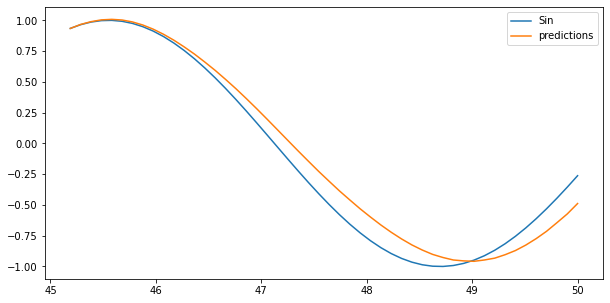

In [223]:
test_set.plot(figsize=(10,5))